In [1]:
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [2]:
import pandas as pd
df = pd.read_csv("../data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
# A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

In [4]:
# top 20 de fallecidos
top20 = df.groupby("location")["total_deaths"].sum().sort_values(ascending=False)[:20]
top20

location
World             709830655.0
Europe            209623432.0
North America     193716858.0
South America     164455044.0
European Union    142338593.0
United States     133764343.0
Asia              116742581.0
Brazil             80717948.0
India              50434903.0
Mexico             46891587.0
Peru               38526518.0
United Kingdom     31106660.0
Italy              28153262.0
Africa             24979353.0
France             24594693.0
Russia             20439019.0
Spain              20429587.0
Iran               17124901.0
Colombia           15552891.0
Germany            14883290.0
Name: total_deaths, dtype: float64

In [5]:
# La letra de mi DNI es la 'H'. No hay ningun pais que empiece por esa letra que este en el top20, por lo que el analisis se hará con 'Spain'
top20.index.str.startswith("H")

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [6]:
# En este caso, utilizaremos las columnas:
    #Nuevos casos
    #Nuevos fallecidos
    #Población
    #Fallecidos totales
    #Casos totales

# La fecha debe estar en el índice.


In [7]:
df1 = df[df["location"] == "Spain"]
df1 = df1[["new_cases", "new_deaths", "population", "total_deaths", "total_cases", "date"]]
df1.head()

,new_cases,new_deaths,population,total_deaths,total_cases,date
81240,1.0,NaN,46754783.0,NaN,1.0,2020-02-01
81241,0.0,NaN,46754783.0,NaN,1.0,2020-02-02
81242,0.0,NaN,46754783.0,NaN,1.0,2020-02-03
81243,0.0,NaN,46754783.0,NaN,1.0,2020-02-04
81244,0.0,NaN,46754783.0,NaN,1.0,2020-02-05


In [8]:
df1 = df1.set_index(df1["date"])
df1.fillna(0,inplace=True)
df1.drop(["date"], 1, inplace=True)

In [9]:
# 1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

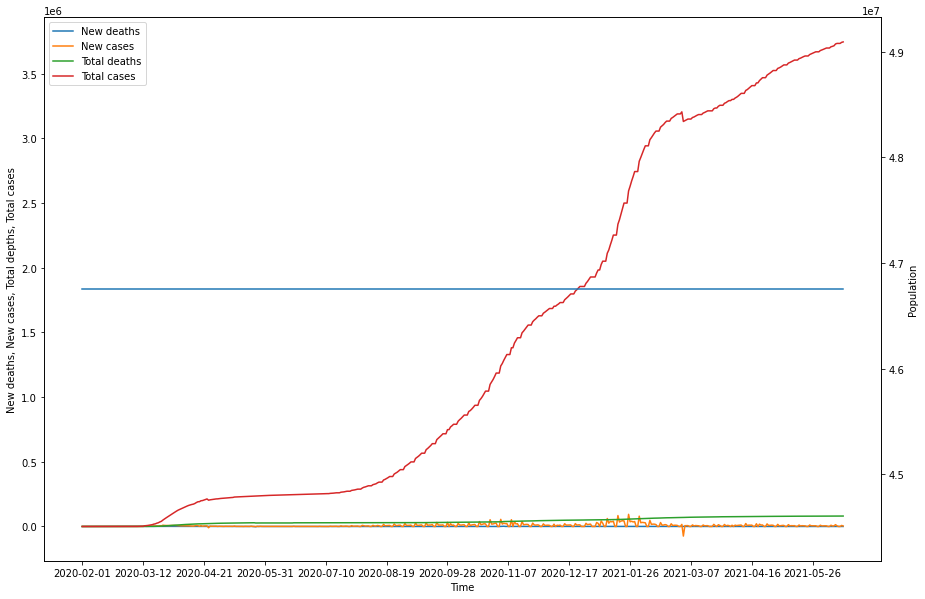

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(df1.index, df1.new_deaths, label="New deaths")
ax.plot(df1.index, df1.new_cases, label="New cases")
ax.plot(df1.index, df1.total_deaths, label="Total deaths")
ax.plot(df1.index, df1.total_cases, label="Total cases")
ax2 = ax.twinx()
ax2.plot(df1.index, df1.population, label="Population")


ax.set_xlabel("Time")
ax.set_ylabel("New deaths, New cases, Total depths, Total cases")
ax2.set_ylabel("Population")

ax.legend()

ticks = ax.get_xticks()[::40]
ax.set_xticks(ticks)

plt.show()

In [11]:
# 2. Elimina la columna "Población".

In [12]:
df1.drop("population", 1, inplace=True)
df1

,new_cases,new_deaths,total_deaths,total_cases
date,,,,
2020-02-01,1.0,0.0,0.0,1.0
2020-02-02,0.0,0.0,0.0,1.0
2020-02-03,0.0,0.0,0.0,1.0
2020-02-04,0.0,0.0,0.0,1.0
2020-02-05,0.0,0.0,0.0,1.0
...,...,...,...,...
2021-06-11,4142.0,36.0,80501.0,3733600.0
2021-06-12,0.0,0.0,80501.0,3733600.0
2021-06-13,0.0,0.0,80501.0,3733600.0


In [13]:
# 3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. 

# Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. 

# ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

# 4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [14]:
def score_func(model, X, y, n_splits, n_repeats, random_state=42):
    """
    This funcion trains any given model and returns its train and validation score.

    Params: 
        Model to calculate its score.
        X (features) and y (target) values.
        n_splits = repeatedKfold iteration
        n_repeats = repeatedKfold epoch
    """
    k_fold = RepeatedKFold(n_splits, n_repeats)

    val_score = []
    train_score = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    for i, (train, val) in enumerate(k_fold.split(X_train)):

        model.fit(X_train[train], y_train[train])
        score_val = model.score(X_train[val], y_train[val])

        predictions_train = model.predict(X_train[train])
        predictions_val = model.predict(X_train[val])

        val_score.append(score_val)
        score_train = model.score(X_train[train], y_train[train])
        train_score.append(score_train)

    dictionary = {"Train Score": train_score, "Validation Score": val_score} 
    scores = pd.DataFrame(dictionary)
    return scores

In [26]:
def model_score_func(X, y, degree, n_splits, n_repeats, random_state=42):
    """
    Depending on the given model this function trains calls another to train and return its score

    Params: 
        X (features) and y (target) values.
        degrees = range of all different degrees for the polinominal model
        n_splits = repeatedKfold iteration
        n_repeats = repeatedKfold epoch
    """    
    model_list = ["SVR", "RandomForestRegressor", "PolynomialFeatures"]
    dataframe_dic = {}

    for model in model_list:

        if model == "PolynomialFeatures":

            for d in degree:
                model = PolynomialFeatures(d) 
                X_poly = model.fit_transform(X, y)
                model_1 = LinearRegression()
                dataframe_dic["PolynomialFeatures"] = score_func(model_1, X_poly, y, n_splits, n_repeats, random_state)

        elif model == "SVR":
            model = SVR()
            dataframe_dic["SVR"] = score_func(model, X, y, n_splits, n_repeats, random_state)

        elif model == "RandomForestRegressor":
            model = RandomForestRegressor()
            dataframe_dic["RandomForestRegressor"] = score_func(model, X, y, n_splits, n_repeats, random_state)

    return dataframe_dic

In [27]:
from pprint import pprint

X1 = np.array(df1.drop("new_cases", 1))
y1 = np.array(df1["new_cases"])
scores = model_score_func(X1, y1, degree=list(range(1,8)), n_splits=23, n_repeats=7, random_state=42)

In [28]:
pprint(scores)

{'PolynomialFeatures':      Train Score  Validation Score
0       0.681464          0.703701
1       0.693856          0.554619
2       0.690817          0.557515
3       0.682208          0.868751
4       0.690190          0.592232
..           ...               ...
156     0.689093          0.549409
157     0.692737          0.578514
158     0.683857          0.840399
159     0.692923          0.180667
160     0.676160          0.740496

[161 rows x 2 columns],
 'RandomForestRegressor':      Train Score  Validation Score
0       0.952468          0.462815
1       0.958562          0.477695
2       0.957447          0.810382
3       0.957368          0.841118
4       0.957363          0.574019
..           ...               ...
156     0.960325          0.490373
157     0.959212          0.135084
158     0.960041          0.753716
159     0.958132          0.882732
160     0.956390          0.796757

[161 rows x 2 columns],
 'SVR':      Train Score  Validation Score
0      -0.132711  

In [51]:
# Tenemos 7 epocas con 43 iteraciones, por lo que el rango va desde 1 a 161+1 con un step de 23
def plot_scores ():
    """
    """
    model_list = ["SVR", "RandomForestRegressor", "PolynomialFeatures"]

    for model in model_list:
        
        if model == "PolynomialFeatures":
            for i in range(1, 162, 23):
                fig, ax = plt.subplots()
                ax.plot(scores["PolynomialFeatures"]["Train Score"][i:i+23], color="green", label="Train Score")
                ax.plot(scores["PolynomialFeatures"]["Validation Score"][i:i+23], color="red", label= "Validation Score")
                ax.legend(loc="best") 
                plt.title(model)
        
        else:
            fig, ax = plt.subplots()
            ax.plot(scores[model]["Train Score"], color="green", label="Train Score")
            ax.plot(scores[model]["Validation Score"], color="red", label= "Validation Score")
            ax.legend(loc="best")
            plt.title(model)


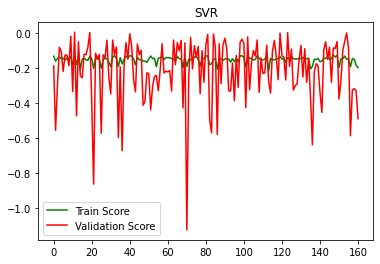

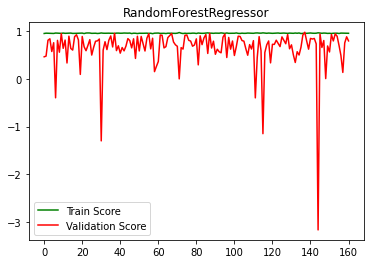

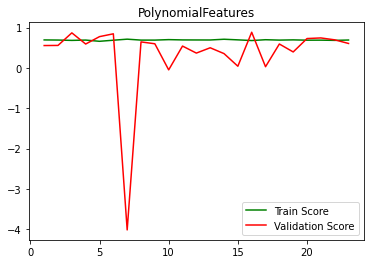

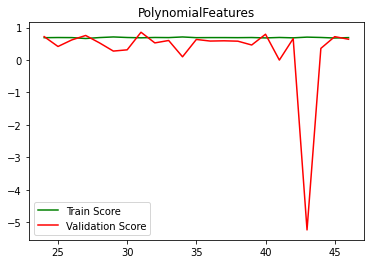

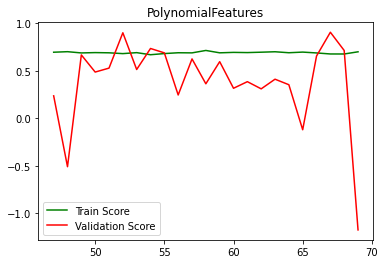

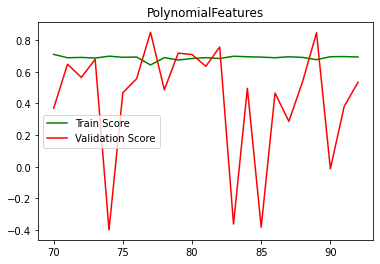

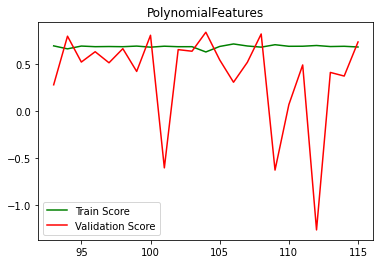

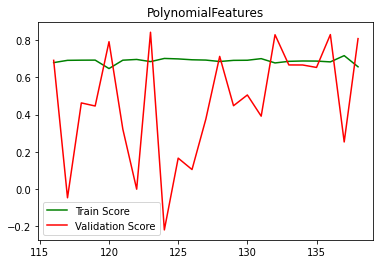

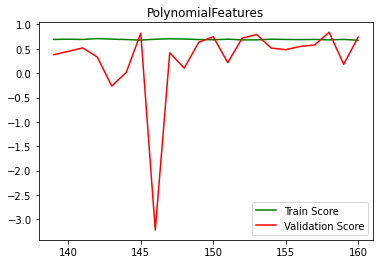

In [52]:
plot_scores()